# Titanic: Machine Learning from Disaster


---

This is one of the most famous Kaggle [kaggle.com](http://kaggle.com) challenges out there. 

As you know, the sinking of the *most modern ship in the world* at the time was quite a story. Despite the technology available, after hitting an iceberg on April 15th, 1912, it sank, **killing a total of 1502 people out of its 2224 passengers.**

<center><img src="https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/data_science-master/img/titanic.jpeg?raw=true"></center>

The lack of lifeboats for crew and passengers as well as some irresponsible actions taken by the crew contributed to the disaster. 

The survivors were obviously lucky, but were there any passengers that were "luckier" than others? Did women and children have a better chance of surviving? Did Jack have fewer chances of surviving than Rose, given the fact he was a 3rd class passenger?

With the **real** data available, we can do an exploratory analysis, test hypotheses, and build a predictive model.

> **In a nutshell, the goal of this challenge is to use the available data to measure the chances of surviving for every passenger on the Titanic.** 

## About this notebook

This notebook is inspired by the one created by the brazilian Data Scientist Carlos Melo, and published in his blog [sigmoidal.ai](http://sigmoidal.ai):


## Checklist

1. Defining the problem
2. Obtaining the data
3. Exploring the data
4. Preparing the data
5. Building the model
6. Evaluation

## 1. Defining the problem.

Building the Titanic took about 2 years and cost 7.5 million dollars at the time. It had a crew of 892 people and capacity to house up to 2435 passengers, divided into three classes.

It was intended to be the safest and most luxurious ship of the time. It went to sea in 1911, having a reputation of being unsinkable.

As stated before, many factors contributed to the disaster, including the climate, negligence of the crew and excessive confidence. Regardless, its sinking killed 1502 out of a total of 2224 passengers.

Despite being lucky, some passengers were more prone to surviving than others, like women, children, and first-class passengers. Therefore, we can notice patterns to be extracted from the raw data.

### Objective

The goal is to **analyze which variables had a bigger influence on the probability of surviving** (that is, what kind of person was more likely to make it out alive).

After analyzing the data, we need to build **a model to predict the chances of surviving** of a random passenger entered as *input*.


### Performance Metrics

The *score* is calculated according to the number of correct predictions achieved by the model. That is, only the **accuracy** of the model is considered.


## 2. Obtaining the Data

[The data is available on Kaggle.](https://www.kaggle.com/c/titanic/data) It was divided into two sets:

* Training Dataset (```train.csv```)
    * Must be used to build the Machine Learning model. In this set, it is known whether the passenger survived or not. 
    * There are many features such as passenger gender, age and class.
* Test Dataset (```test.csv```)
    * Must be used as the data that has never been seen by the model. In this set, it isn't known whether the passenger survived or not.
    
Kaggle also made a submission model available
(```gender_submission```).

To download the data, it's necessary to be logged into Kaggle. To make it easier, all the data was made available with this notebook. (folder ```./data/...```

In [0]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Allowing all the columns to be visualized
pd.options.display.max_columns = None

# Rendering all graphics straight out of the notebook
%matplotlib inline

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Titanic_Kaggle/master/data_science-master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Titanic_Kaggle/master/data_science-master/data/test.csv')

**Q1.** How many variables (columns) and how many entries (lines) are there in the file?

In [4]:
# Analyzing the shape of the DataFrame
print("Variables:\t{}\nEntries:\t{}".format(train.shape[1], train.shape[0]))

Variables:	12
Entries:	891


## 3. Exploring the Data

In an initial analysis, each variable must be studied. It's important to check its name, type, percentage of missing values, presence of outliers and the type of distribution.

Since it's a case of *Supervised Learning*, the variable ```Survived``` is defined as being our *target* variable.

### Data Dictionary

* **PassengerId:** Identification number of the passenger
* **Survived:** Informs whether the passenger survived or not
    * 0 = No
    * 1 = Yes
* **Pclass:** Class of the ticket
    * 1 = 1st Class
    * 2 = 2nd Class
    * 3 = 3rd Class
* **Name:** Passenger's name
* **Sex:** Passenger's sex
* **Age:** Passenger's age
* **SibSp:** Quantity of spouses or siblings aboard
* **Parch:** Quantity of parents or children aboard
* **Ticket:** Ticket number
* **Fare:** Fare price
* **Cabin:** Passenger's cabin number
* **Embarked:** Port where the passenger embarked
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Q1. What is the type of each variable?**

* Numerical Variables
    * Discrete
        * Pclass
        * SibSp
        * Parch
    * Continuous
        * Age
        * Fare
    * Target
        * Survived
    * Primary Key
        * PassengerId
* Categorical Variables
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [5]:
# Identifying each variable type
display(train.dtypes)

# Checking the 5 first entries in the Training Set
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. What's the percentage of missing values?**

The **Cabin** column is the one with the most missing values, with over 77%. Next, is the column **Age** that has no values for almost 20% of the passengers. Finally, the column that informs the Port where the passenger embarked (**Embarked**) shows no values for 2% of the passengers. 

In [6]:
# Checking the percentage of missing values
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**Q3. What is the statistical distribution of the data?**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


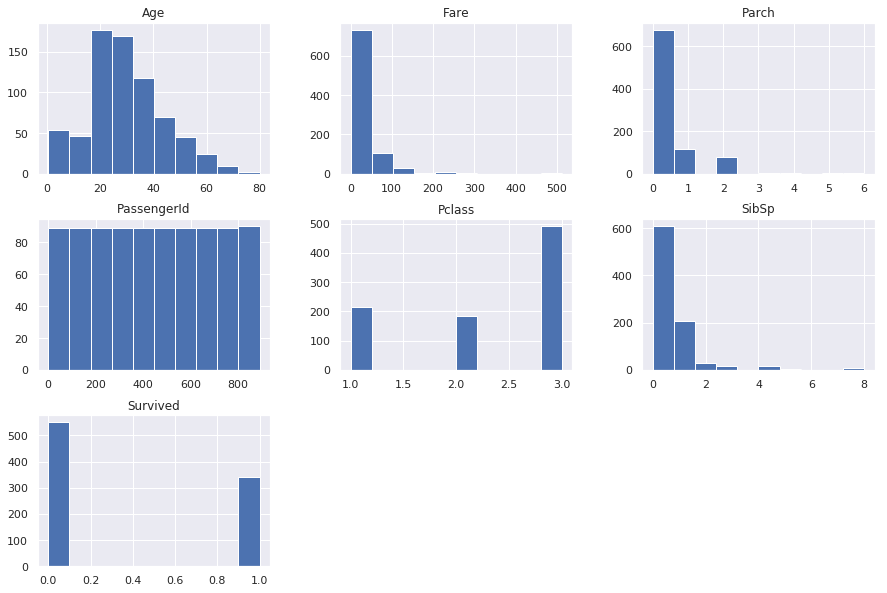

In [8]:
# Checking histograms of the numerical variables
train.hist(figsize=(15,10));
sns.set()

**Q4. Which groups of people had better chances of surviving?**

In [9]:
# Analyzing the probability of survival by Sex
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


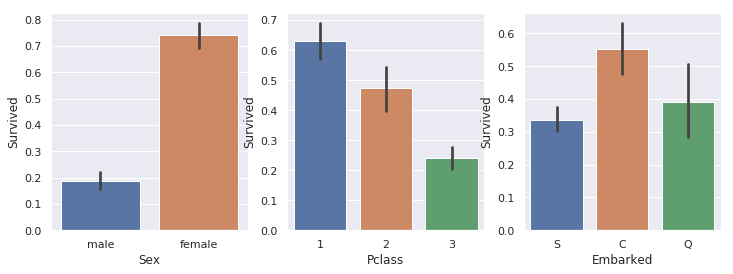

In [10]:
# Plotting graphs for Survived vs. Sex, Pclass and Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

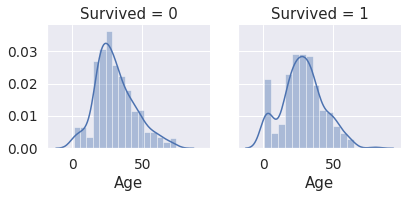

In [17]:
# Checking the infleunce of Age on the probability of survival

age_survived = sns.FacetGrid(train, col='Survived');
age_survived.map(sns.distplot, 'Age');


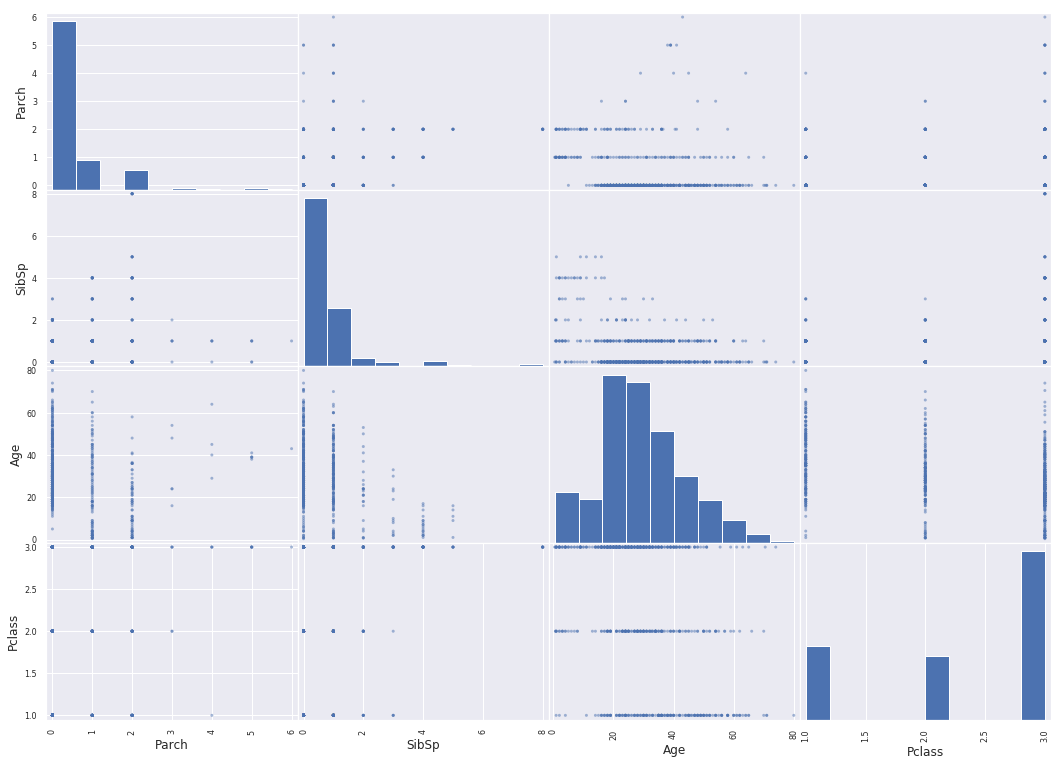

In [12]:
# Plotting a scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(18, 13));

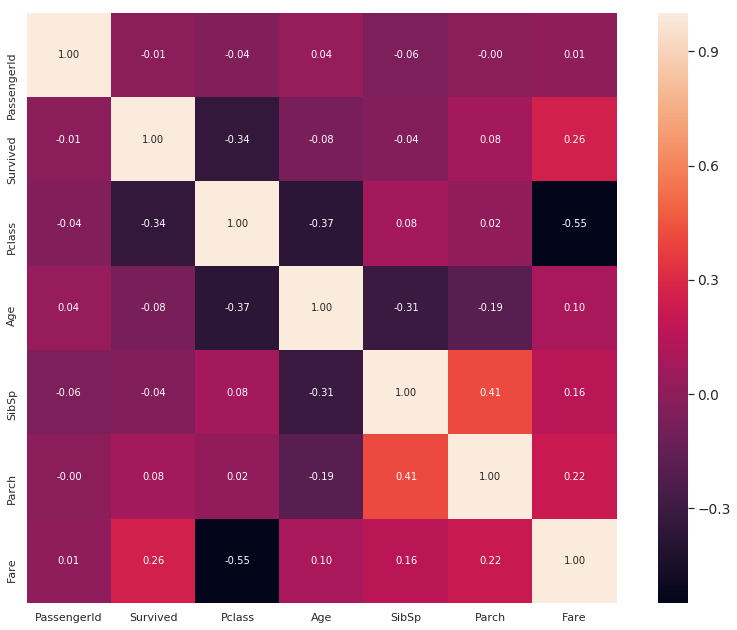

In [13]:
# Plotting a heatmap for all numerical variables

f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(train.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.tight_layout()

Remember that the method ```df.describe()``` can also be used to check descriptive statistics in columns that aren't numbers. All we have to do is use the argument ```include=['O']```. 

**ATTENTION! Mind it's the letter 'O', and not the number "0"!**

In [24]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mitkoff, Mr. Mito",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Analyzing this data, we can see that:
* The entries for ```Name``` are unique, one for each person;
* There are no *missing values* for ```Name``` and ```Sex```;
* There are only two sexes: Male and Female, Male being more frequent (577/891 = 65%);
* The Port where more passengers embarked was S = Southampton.

## 4 Preparing the Data

Until now, all we did was import the data to *DataFrame* structures, formulate hypotheses, start an exploratory analysis of the data and visualize graphs and correlations among the variables we found relevant.


### Putting the train and test *datasets* together

When preparing data for a *Machine Learning* model, it's a good idea to put the train and test *datasets* together, and separate them only at the end.

We often work with *feature engineering*, creating *dummy* variables or encoding variables. Then, our model will be trained on this architecture, and the data from both sets will follow the same structure.

That's why it's a lot easier to go through all the steps in only one *DataFrame* and only at the end, divide it into train and test again.

In [18]:
# Saving the indexes of the datasets for later recovery
train_idx = train.shape[0]
test_idx = test.shape[0]

# Saving PassengerId for Kaggle submission
passengerId = test['PassengerId']

# Extracting the column 'Survived' and excluding it from the train dataset
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# Concatenating train and test into one DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("Variables:\t{}\nEntries:\t{}".format(df_merged.shape[1], df_merged.shape[0]))

df_merged.shape: (1309 x 11)
Variables:	11
Entries:	1309


### Selecting the *features*

We often come across useless and/or irrelevant data for our models.

In this case, the variables ```['PassengerId', 'Name', 'Ticket', 'Cabin']``` will be discarded, since they **seem** not to be relevant to our model.

In [0]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Therefore, the following variables will be treated and prepared to be used in our model: ```['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']```.

### Missing Values

When it comes to *missing values*, there are two approaches we can try:
* Filling them arbitrarily (mean, median, most frequent value); or
* Deleting the whole line.

More often than not, throwing away the information in a whole line just because of a missing field is not what we want. Whenever possible, it's better to fill it up, and that's what we are going to do.

In [20]:
# Completing or deleting missing values from train and test datasets
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

For the variables ```['Age']```, and ```['Fare']```, I'll fill in with the median, and for the variable ``['Embarked']``, I'll fill in with the most frequent value.

In [0]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### Preparing the variables for the model

The mathematical model demands us to work with numerical variables. That means we have to transform the categorical data entered into numbers.

As you can see, I've converted the possible values for ```Sex``` to ```{'male': 0, 'female': 1}```. For```Embarked```, the concept of *dummy* variables was applied.

*Dummy variables* take only 0 or 1 as values, creating a new column for every possible categorical variable. To make it easier to understand, take a look at the *Data Frame* after this treatment:

In [22]:
# Converting 'Sex' into 0 or 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Dummy variables for 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recovering train and test datasets

After preparing the *dataset* for the model, it's time split it into ```train``` and ```test```, just like it was at the beginning .

We would've had double the work to prepare both datasets for the model and had bigger chances of making mistakes had we not separated the datasets.

In [0]:
# Recovering train and test datasets
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## 5 Building and evaluating the model

For this project, we'll use two basic *Machine Learning* models:

* Logistic Regression
* Decision Tree

In [0]:
# Importing the necessary libraries for the Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Creating the Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# Checking the accuracy of the model
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Logistic Regression Model Accuracy: {}".format(acc_logReg))

Logistic Regression Model Accuracy: 80.13


With about two lines of code, we built a Logistic Regression model with an accuracy of over 80% on the training dataset.

This is an excellent result for a first model. Now, let's make a preview about the test *dataset* so we can submit it to [Kaggle](http://www.kaggle.com) and compare the results.

In [0]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_lr.csv', index=False)
files.download('submission_lr.csv')

As you can see, the model hit an accuracy score of 75%. 

<img src="https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/data_science-master/img/kaggle_lr.png?raw=true" width="80%">

It's not unusual to have a slightly worse result when we submit previews since our dataset was trained on a training dataset with a better fit to it.

Now, let's create a Decision Tree model following the same steps.

In [34]:
# Creating a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# Checking the accuracy of the model
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Decision Tree Model Accuracy: {}".format(acc_tree))

Decision Tree Model Accuracy: 82.72


With the Decision Tree model, the accuracy slightly improved, reaching 83%. Let's submit it to [Kaggle](http://www.kaggle.com).

In [0]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# generating csv file
submission.to_csv('submission_tree.csv', index=False)
files.download('submission_tree.csv')

As you can see, the model hit an accuracy score of 75%. 

<img src="https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/data_science-master/img/kaggle_tree.png?raw=true" width="80%">

As predicted, we improved our results on the training dataset as well, getting a score of 78%

### Would you have survived the Titanic disaster?

Finally, with the models ready, it's time to find out if we would have survived the disaster.

It's time to found out if I would have survived having boarded with a 3rd class ticket, being a man, at age 23, no siblings, spouse, parents or children aboard, paying the average fare and boarding at the most common port.

In [42]:
# Declaring values for the passenger
passenger = np.array([3, 0, 23, 0, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# Checking if would have survived
print("Rafael:\t{}".format(tree_model.predict(passenger)[0]))

Rafael:	0


## Conclusion
Unfortunately, according to this model, I wouldn't have survived the Titanic.

According to the data we analyzed, I would have been in the worst possible condition, being a young man, with no siblings, spouse, parents or children aboard, with a 3rd class ticket.

After a couple of tests, I also found out that even having a 1st class ticket wouldn't have saved me.

***What about you? Would you have survived?***

Feel free to use my model and figure it out for yourself!

In [41]:
# Choose your class
Class = 3

# Sex = Man: 0 | Woman: 1
Sex = 0 
# Age
Age = 23
# Enter the number of Siblings or Spouses aboard
SibSp = 0
# Enter the number of Parents or Siblings aboard
ParCh = 0
# Fare paid (You don't need to change this one)
Fare = 32 

# Choose the port from which you would have embarked. 
# Change to '1' (True) the selected port. Leave the others as '0' (False)
Cherbourg = 0

Queenstown = 0 

Southampton = 1 


# Preparing the data for verification
Fare = int(Fare)

# Declaring values for the passenger
passTest = np.array([Class, Sex, Age, SibSp, ParCh, Fare, Cherbourg, Queenstown, Southampton, 1]).reshape((1, -1))

# Checking if would have survived
print("Survived = 1 | Died = 0")
print("Result:\t{}".format(tree_model.predict(passTest)[0]))

Survived = 1 | Died = 0
Result:	0
